In [1]:
from load_data import get_all_generation_data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dimensionality_reduction import pca_reduction, scale_df, kernel_pca_reduction, nmf_reduction


In [2]:
# DATA GENERATION
# Fetch concatenated all generation bulk molecule data
data = get_all_generation_data()
# Extract just generations 1,2 & 3
# Keep only time series data

data['time'] = data['time'].apply(lambda x: x.flatten())
data['start'] = data.time.apply(lambda x: x[0])
data['end'] = data.time.apply(lambda x: x[-1])
data['division_time'] = data['1-PFK[c]'].apply(len)
data.generation = data.generation.apply(lambda x: int(str(x)[-1]))

In [3]:
def get_timepoint_index(x, timepoint):
    try:
        return np.where(np.isclose(x.flatten(), timepoint, atol=59.9) == True)[0][0]
    except:
        return np.nan

In [4]:
def extract_timepoint_value(x, idx):
    return x.flatten()[idx]

In [5]:
timepoint = 4300.0
data['idx'] = data.time.apply(lambda x: get_timepoint_index(x, timepoint))
data_slice = data.copy().dropna()

In [6]:
# Create single timepoint data
single_timepoint_df = data_slice.drop(['time', 'date_of_sim', 'cell_id', 'media', 'generation', 'gene_ko', 'tyrU-tRNA[c]', 'idx', 'start', 'end', 'division_time'], axis=1)
for index in np.unique(data_slice.idx):
    single_timepoint_df.loc[data_slice.idx == index] = single_timepoint_df.loc[data_slice.idx == index].applymap(lambda x: int(x.flatten()[int(index)]))
single_timepoint_df = single_timepoint_df.astype('int64')
print(single_timepoint_df.head)

<bound method NDFrame.head of      1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER[i]  1-PFK[c]  \
8                                           117        63   
9                                            83       104   
23                                          273        59   
24                                          109        73   
38                                          169        35   
..                                          ...       ...   
597                                         161        20   
611                                         170        15   
612                                         212        24   
626                                         309        36   
627                                         138        50   

     2-3-DIHYDROXYBENZOATE[c]  2-DEHYDROPANTOATE-REDUCT-MONOMER[c]  \
8                      149442                                  192   
9                      151172                                  182   
23                     1461

In [7]:
scaled_single_timepoint = pd.DataFrame(scale_df(single_timepoint_df), columns=single_timepoint_df.columns)

In [8]:
# PCA

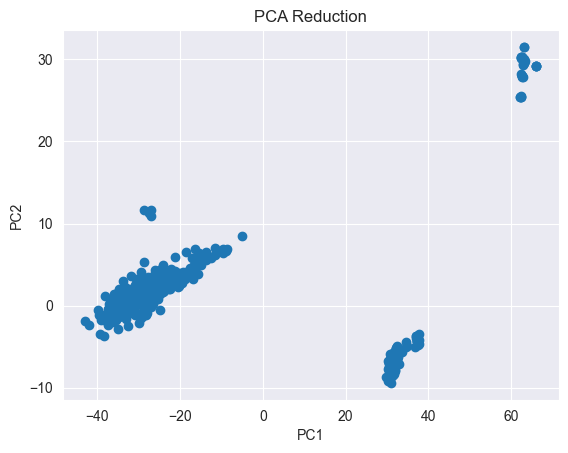

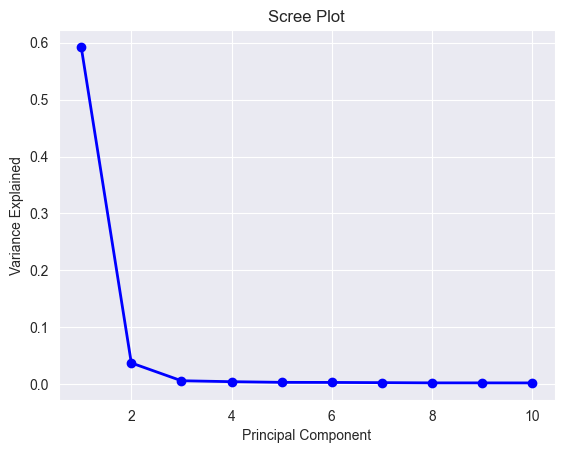

1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER[i]
1838
                                                 PC1       PC2       PC3  \
1-ACYLGLYCEROL-3-P-ACYLTRANSFER-MONOMER[i]  0.025635  0.002877  0.000112   
1-PFK[c]                                    0.015112  0.006265  0.010455   
2-3-DIHYDROXYBENZOATE[c]                    0.029888  0.013393  0.025578   
2-DEHYDROPANTOATE-REDUCT-MONOMER[c]         0.022242  0.000763  0.024815   
2-ISOPROPYLMALATESYN-MONOMER[c]             0.012944  0.035854  0.063153   
...                                              ...       ...       ...   
thrT-tRNA[c]                                0.028868  0.000753  0.036976   
thrU-tRNA[c]                                0.028804  0.000612  0.037428   
thrV-tRNA[c]                                0.028285  0.002988  0.057043   
trpT-tRNA[c]                                0.022497  0.078058  0.009560   
tyrT-tRNA[c]                                0.002526  0.028077  0.018744   

                                       

array([[ 3.02842181e+01, -7.71229679e+00,  3.52433596e-01, ...,
         9.41925112e-01,  1.67677285e-01,  4.30326343e-01],
       [ 3.11534781e+01, -8.07890683e+00,  5.25036544e-01, ...,
         7.49105671e-01,  4.94497104e-01,  1.90617655e-01],
       [ 3.14325157e+01, -6.50945070e+00,  6.11203721e-01, ...,
         6.43502680e-01,  2.50391270e-01,  1.39456682e+00],
       ...,
       [ 3.19019708e+01, -6.20849348e+00,  2.18676284e-02, ...,
        -1.14686524e+00, -9.60777184e-01, -1.37246650e-01],
       [ 3.12256366e+01, -7.54662367e+00, -2.31070782e-01, ...,
        -4.22422520e-02,  7.41492824e-01,  9.91143892e-01],
       [ 3.16861873e+01, -7.65231171e+00,  7.79121820e-01, ...,
         1.34800466e+00,  4.11219213e-01,  8.48288183e-01]])

In [9]:
# Elbow method to determine number of components
pca_reduction(scaled_single_timepoint, n_components=10, plot=True, get_metrics=False)

Time taken to generate ranking dataframe: 48.88s
Time taken to convert to matrix: 0.0s
Time taken to generate ranking dataframe: 54.22s
Time taken to convert to matrix: 0.0s
[[  0   1 101 ... 123 166  88]
 [  1   0  96 ... 111  95  23]
 [110  37   0 ...  90 106  43]
 ...
 [155  58 105 ...   0 102  11]
 [140  10  59 ...  37   0   1]
 [153  17  81 ...  25   1   0]]
[[  0  25  51 ... 155 108 149]
 [ 70   0  80 ... 153  56  90]
 [135  99   0 ... 108 141 165]
 ...
 [186 159  95 ...   0  80 100]
 [166  48 118 ...  58   0  33]
 [188  77 127 ...  71  17   0]]
R1 shape: (557, 557)
R2 shape: (557, 557)
Qlocal =  0.5604451454392483
rMSE =  0.3591647034445458
--- Distance Matrices (D and Dz) ---


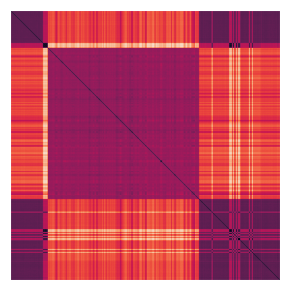

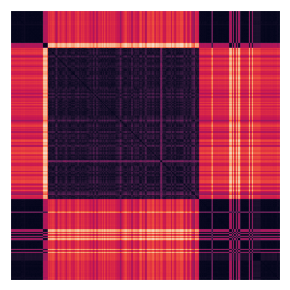

Residual Variance (using Pearson's r) =  0.06738757880680768
Residual Variance (using Spearman's r) =  0.05234583083634259
--- Ranking Matrices (R and Rz) ---


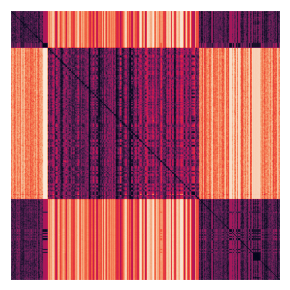

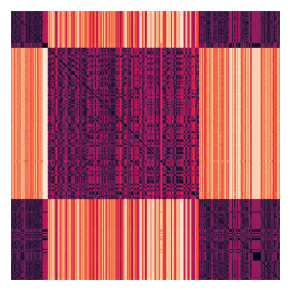

--- Co-ranking Matrix (Q) ---


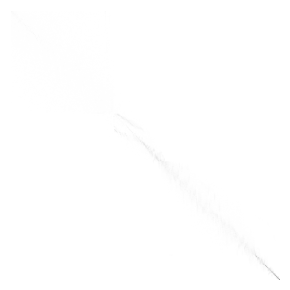

--- Trustworthiness T(k) and Continuity C(k) ---


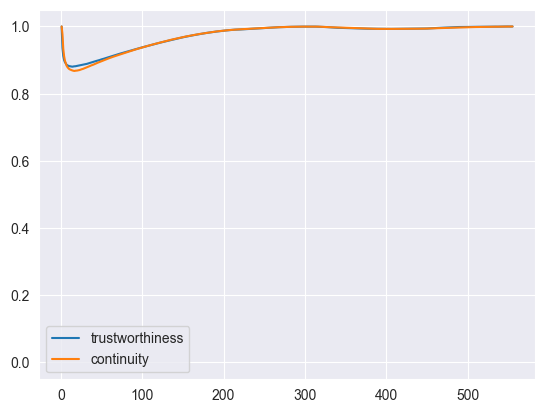

AUC of T =  0.9744849118024319
AUC of C =  0.9737178347021281
--- QNN(k) Curve ---


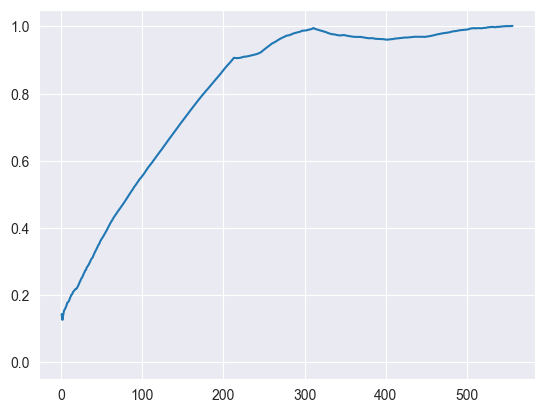

AUC of QNN =  0.8133776209284062
--- LCMC(k) Curve ---


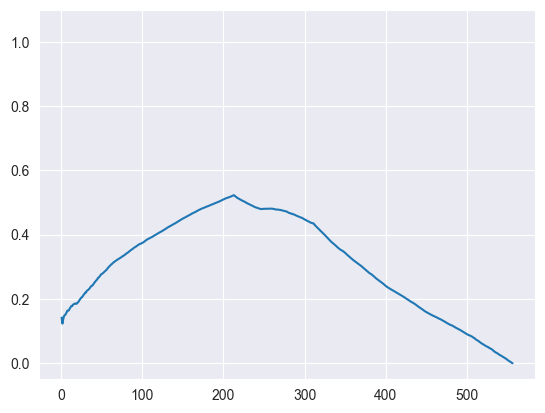

kmax (0-based index) =  212
Qlocal =  0.5604451454392483
Qglobal =  0.970169179636599
None


array([[ 3.02842181e+01, -7.71229679e+00,  3.51904337e-01,
         1.41564413e+00],
       [ 3.11534781e+01, -8.07890683e+00,  5.24660216e-01,
         2.19155381e-01],
       [ 3.14325157e+01, -6.50945070e+00,  6.11073006e-01,
         5.23929432e-01],
       ...,
       [ 3.19019708e+01, -6.20849348e+00,  2.20208184e-02,
        -9.37342258e-01],
       [ 3.12256366e+01, -7.54662367e+00, -2.30333563e-01,
        -8.74086176e-01],
       [ 3.16861873e+01, -7.65231171e+00,  7.79528811e-01,
        -1.36124930e+00]])

In [10]:
# Evaluate PCA using determined number of components
pca_reduction(scaled_single_timepoint, n_components=4, plot=False, get_metrics=True)

In [11]:
from metrics.pyDRMetrics import DRMetrics
kernel_methods = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']


Evaluating method linear...


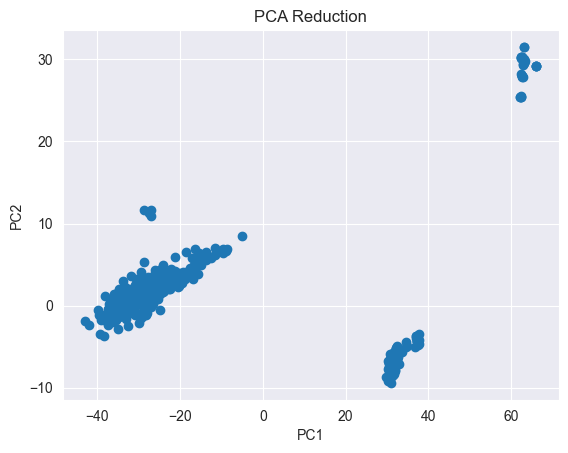

Time taken to generate ranking dataframe: 50.79s
Time taken to convert to matrix: 0.0s
Time taken to generate ranking dataframe: 51.34s
Time taken to convert to matrix: 0.0s
[[  0   1 101 ... 123 166  88]
 [  1   0  96 ... 111  95  23]
 [110  37   0 ...  90 106  43]
 ...
 [155  58 105 ...   0 102  11]
 [140  10  59 ...  37   0   1]
 [153  17  81 ...  25   1   0]]
[[  0  25  51 ... 155 108 149]
 [ 69   0  80 ... 153  56  90]
 [135  99   0 ... 108 141 165]
 ...
 [186 159  95 ...   0  80 100]
 [166  48 118 ...  58   0  33]
 [188  77 127 ...  72  17   0]]
R1 shape: (557, 557)
R2 shape: (557, 557)
Qlocal =  0.5604452707876098
rMSE =  0.3591646767726357
--- Distance Matrices (D and Dz) ---


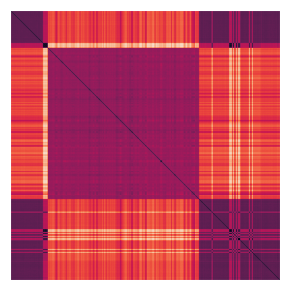

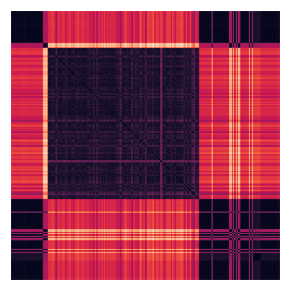

Residual Variance (using Pearson's r) =  0.06738687629885787
Residual Variance (using Spearman's r) =  0.05234335533724044
--- Ranking Matrices (R and Rz) ---


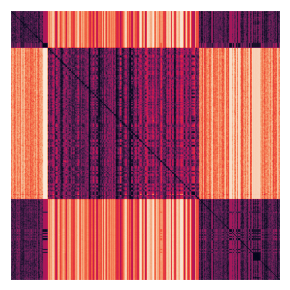

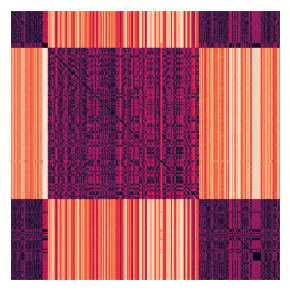

--- Co-ranking Matrix (Q) ---


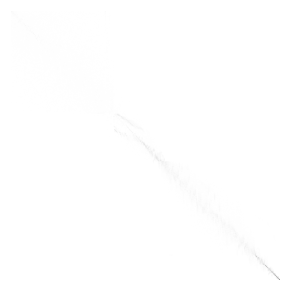

--- Trustworthiness T(k) and Continuity C(k) ---


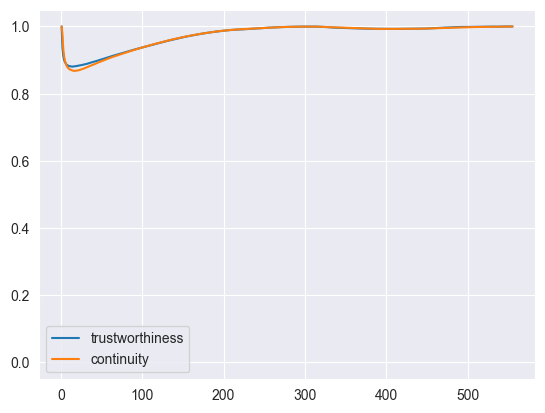

AUC of T =  0.9744879141646119
AUC of C =  0.9737176073457757
--- QNN(k) Curve ---


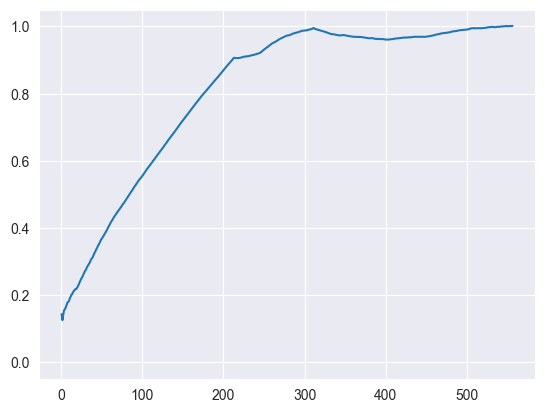

AUC of QNN =  0.8133773420772962
--- LCMC(k) Curve ---


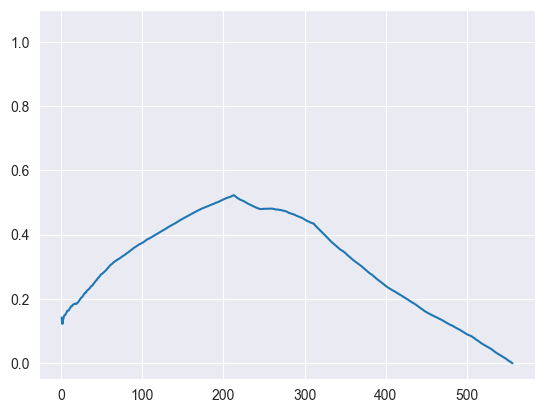

kmax (0-based index) =  212
Qlocal =  0.5604452707876098
Qglobal =  0.9701687482528616
None
Evaluating method poly...


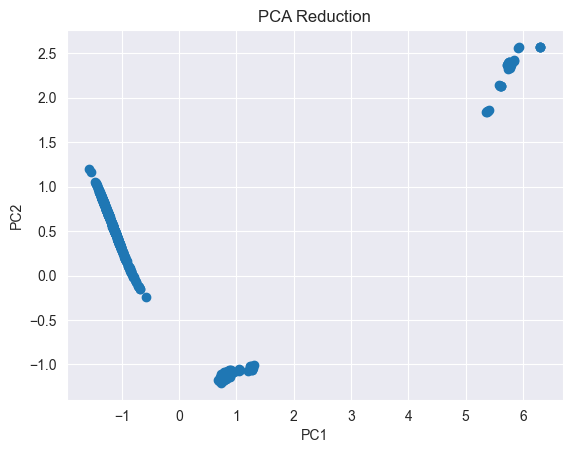

Time taken to generate ranking dataframe: 45.23s
Time taken to convert to matrix: 0.0s
Time taken to generate ranking dataframe: 44.79s
Time taken to convert to matrix: 0.01s
[[  0   1 101 ... 123 166  88]
 [  1   0  96 ... 111  95  23]
 [110  37   0 ...  90 106  43]
 ...
 [155  58 105 ...   0 102  11]
 [140  10  59 ...  37   0   1]
 [153  17  81 ...  25   1   0]]
[[  0  35  95 ... 154  43  97]
 [ 86   0 104 ... 157  10  50]
 [183 157   0 ...  75  97 118]
 ...
 [191 167  55 ...   0 136 116]
 [126  24  88 ... 149   0  44]
 [179  55  91 ... 117  31   0]]
R1 shape: (557, 557)
R2 shape: (557, 557)
Qlocal =  0.5443356209141204
rMSE =  0.3577144732819896
--- Distance Matrices (D and Dz) ---


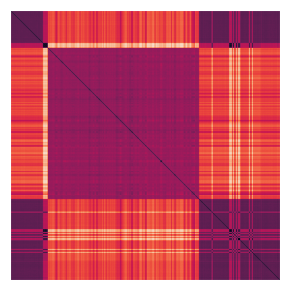

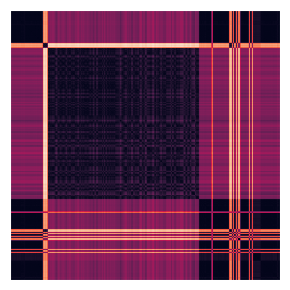

Residual Variance (using Pearson's r) =  0.3454161623427271
Residual Variance (using Spearman's r) =  0.16791060967204952
--- Ranking Matrices (R and Rz) ---


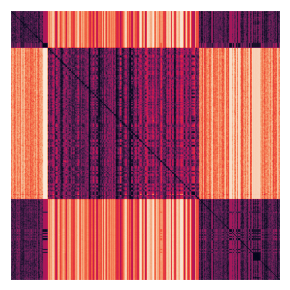

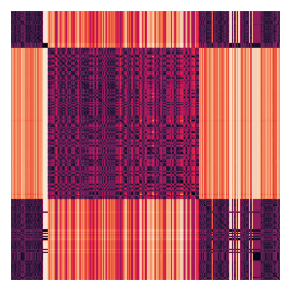

--- Co-ranking Matrix (Q) ---


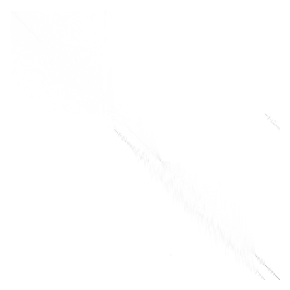

--- Trustworthiness T(k) and Continuity C(k) ---


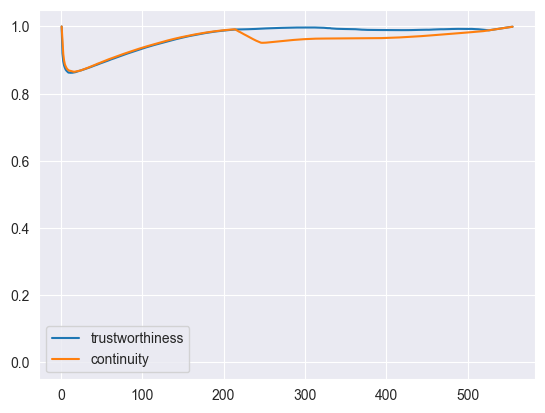

AUC of T =  0.970162959874026
AUC of C =  0.957529565319668
--- QNN(k) Curve ---


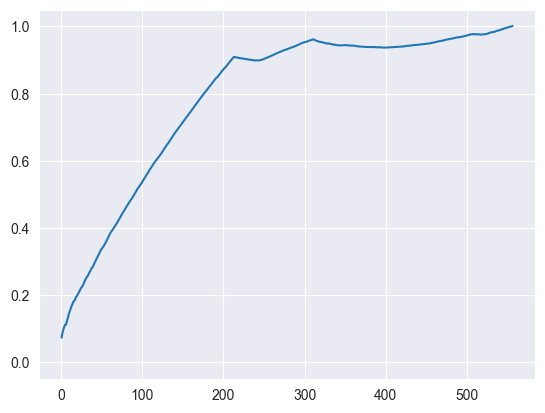

AUC of QNN =  0.7925156934447279
--- LCMC(k) Curve ---


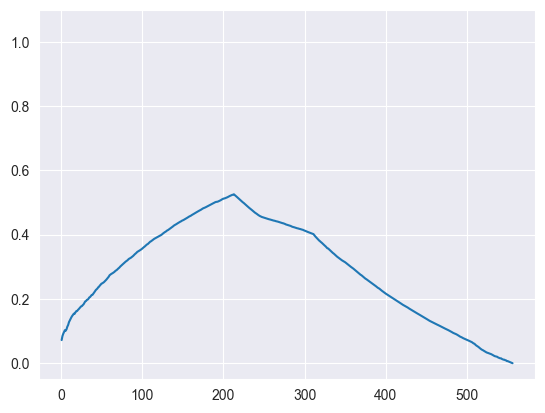

kmax (0-based index) =  212
Qlocal =  0.5443356209141204
Qglobal =  0.9463638553648237
None
Evaluating method rbf...


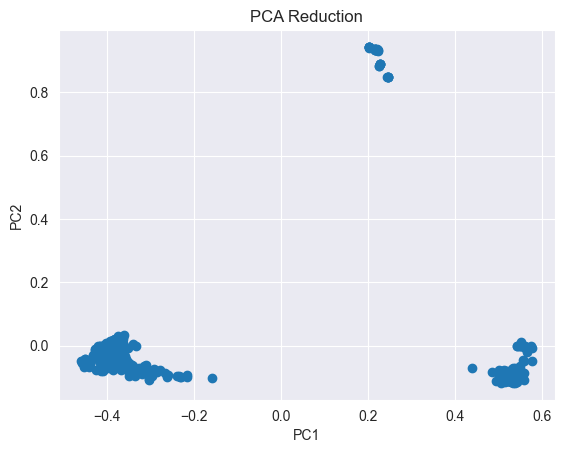

Time taken to generate ranking dataframe: 40.14s
Time taken to convert to matrix: 0.0s
Time taken to generate ranking dataframe: 39.8s
Time taken to convert to matrix: 0.0s
[[  0   1 101 ... 123 166  88]
 [  1   0  96 ... 111  95  23]
 [110  37   0 ...  90 106  43]
 ...
 [155  58 105 ...   0 102  11]
 [140  10  59 ...  37   0   1]
 [153  17  81 ...  25   1   0]]
[[  0  69  77 ... 140  39  97]
 [ 66   0  88 ... 116  95   7]
 [164 174   0 ...  36  76 134]
 ...
 [180 170  27 ...   0 122 114]
 [ 88 158  54 ... 119   0 142]
 [127  10  82 ...  89 112   0]]
R1 shape: (557, 557)
R2 shape: (557, 557)
Qlocal =  0.5278408642872855
rMSE =  0.3662638987428235
--- Distance Matrices (D and Dz) ---


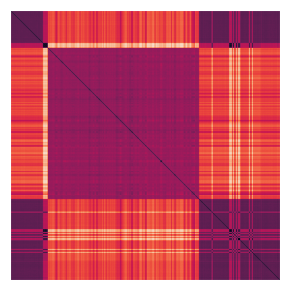

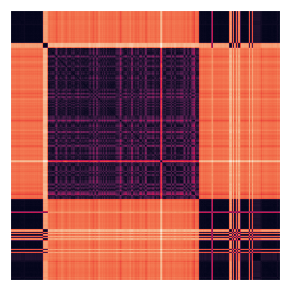

Residual Variance (using Pearson's r) =  0.21916545426119483
Residual Variance (using Spearman's r) =  0.22822963045788303
--- Ranking Matrices (R and Rz) ---


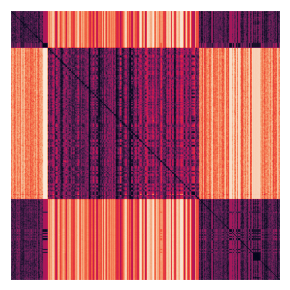

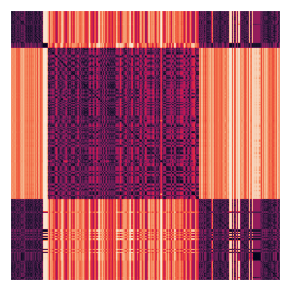

--- Co-ranking Matrix (Q) ---


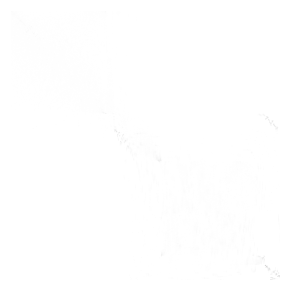

--- Trustworthiness T(k) and Continuity C(k) ---


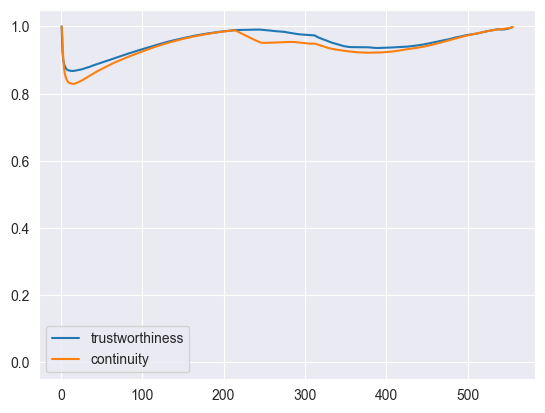

AUC of T =  0.9529613125784496
AUC of C =  0.9405716718815949
--- QNN(k) Curve ---


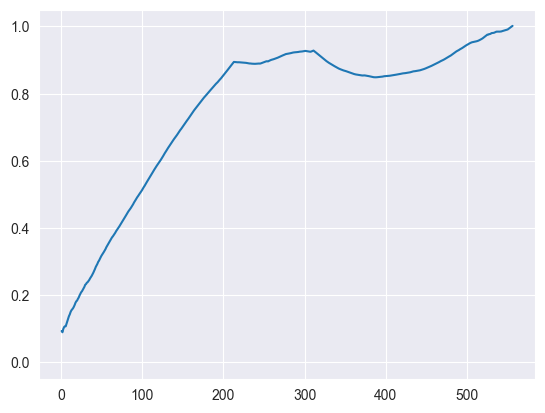

AUC of QNN =  0.7588949445257845
--- LCMC(k) Curve ---


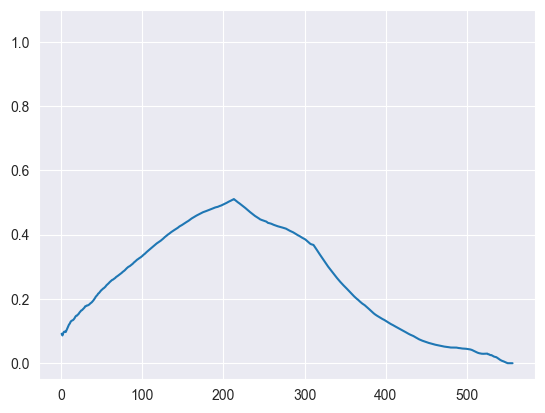

kmax (0-based index) =  212
Qlocal =  0.5278408642872855
Qglobal =  0.9020646628525142
None
Evaluating method sigmoid...


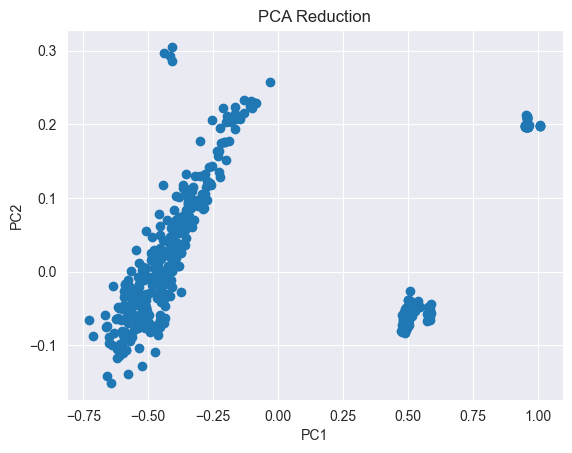

Time taken to generate ranking dataframe: 38.51s
Time taken to convert to matrix: 0.0s
Time taken to generate ranking dataframe: 39.75s
Time taken to convert to matrix: 0.0s
[[  0   1 101 ... 123 166  88]
 [  1   0  96 ... 111  95  23]
 [110  37   0 ...  90 106  43]
 ...
 [155  58 105 ...   0 102  11]
 [140  10  59 ...  37   0   1]
 [153  17  81 ...  25   1   0]]
[[  0  32  44 ... 161 146 158]
 [ 97   0  11 ... 155 138 144]
 [118  12   0 ... 155 149 144]
 ...
 [189 139 131 ...   0  29  25]
 [188 122 138 ...  15   0  29]
 [190 128 125 ...  20  40   0]]
R1 shape: (557, 557)
R2 shape: (557, 557)
Qlocal =  0.5542939015060772
rMSE =  0.4198300308346302
--- Distance Matrices (D and Dz) ---


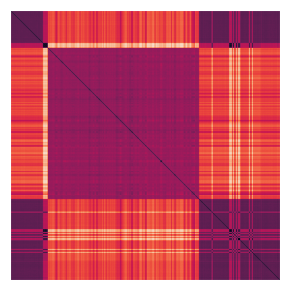

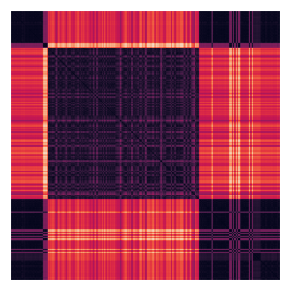

Residual Variance (using Pearson's r) =  0.05983395878122011
Residual Variance (using Spearman's r) =  0.0605659723612445
--- Ranking Matrices (R and Rz) ---


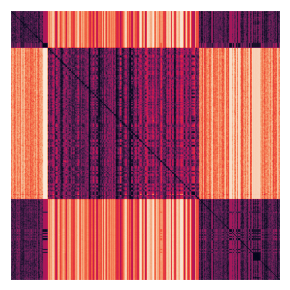

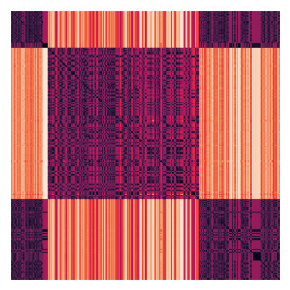

--- Co-ranking Matrix (Q) ---


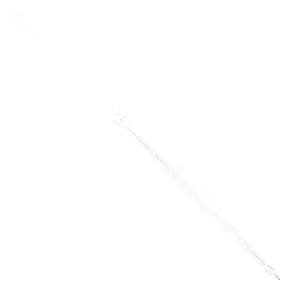

--- Trustworthiness T(k) and Continuity C(k) ---


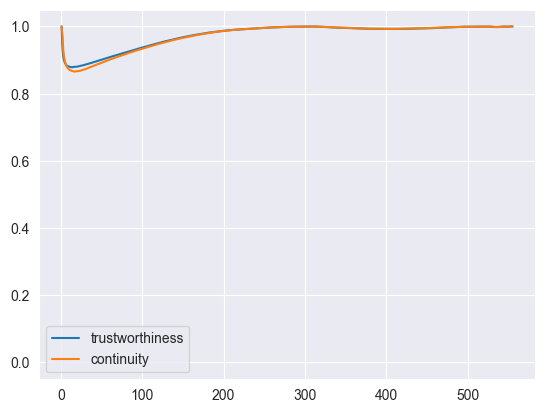

AUC of T =  0.9743321647833512
AUC of C =  0.9729030691810274
--- QNN(k) Curve ---


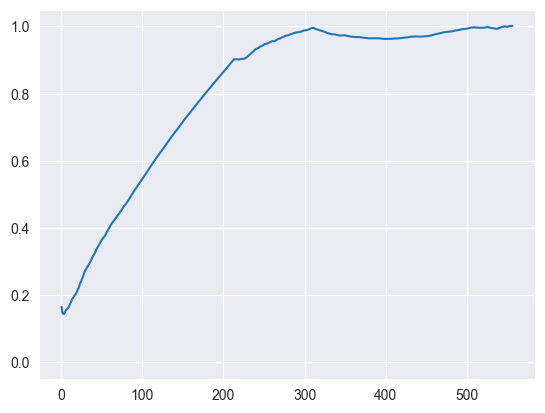

AUC of QNN =  0.8118320275853745
--- LCMC(k) Curve ---


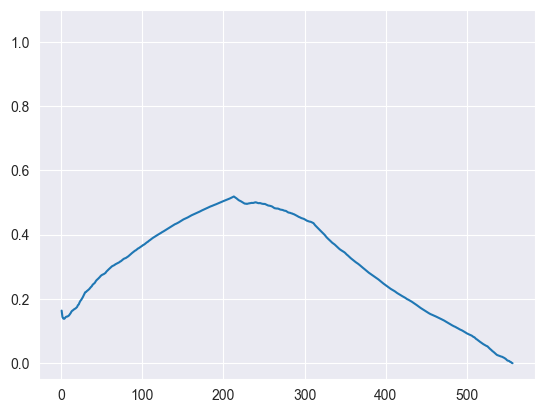

kmax (0-based index) =  212
Qlocal =  0.5542939015060772
Qglobal =  0.971471543007151
None
Evaluating method cosine...


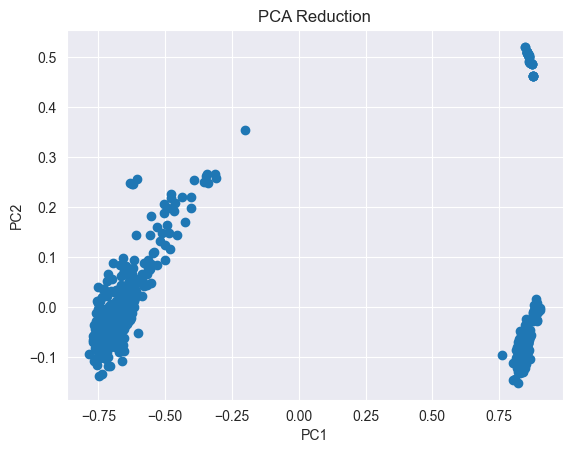

Time taken to generate ranking dataframe: 39.78s
Time taken to convert to matrix: 0.0s
Time taken to generate ranking dataframe: 37.86s
Time taken to convert to matrix: 0.0s
[[  0   1 101 ... 123 166  88]
 [  1   0  96 ... 111  95  23]
 [110  37   0 ...  90 106  43]
 ...
 [155  58 105 ...   0 102  11]
 [140  10  59 ...  37   0   1]
 [153  17  81 ...  25   1   0]]
[[  0  24  60 ... 157  84 144]
 [ 30   0  64 ... 155  57  71]
 [141 119   0 ... 101 125 155]
 ...
 [181 163  76 ...   0  88  94]
 [139  66  78 ...  69   0  44]
 [171  71 100 ...  76  28   0]]
R1 shape: (557, 557)
R2 shape: (557, 557)
Qlocal =  0.5282658043047709
rMSE =  0.380584632487247
--- Distance Matrices (D and Dz) ---


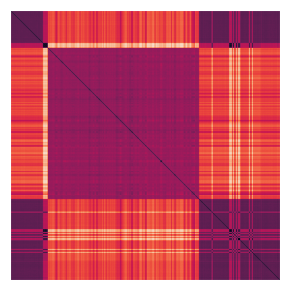

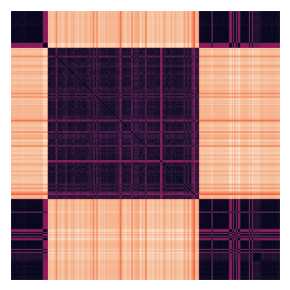

Residual Variance (using Pearson's r) =  0.16988051882064015
Residual Variance (using Spearman's r) =  0.10730232473651191
--- Ranking Matrices (R and Rz) ---


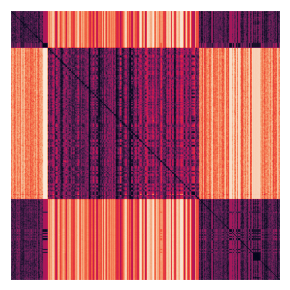

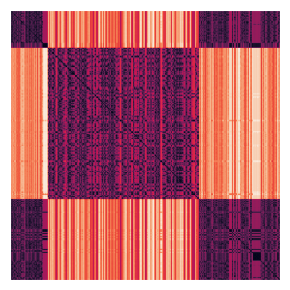

--- Co-ranking Matrix (Q) ---


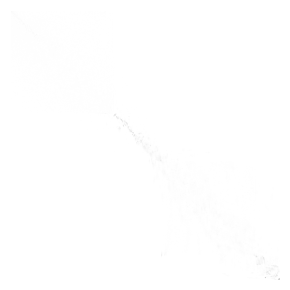

--- Trustworthiness T(k) and Continuity C(k) ---


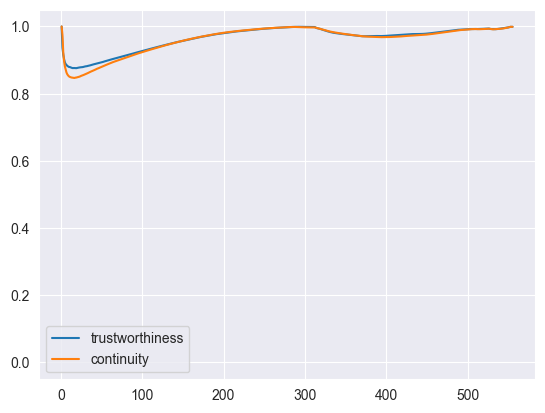

AUC of T =  0.9649591476838695
AUC of C =  0.9618315329628978
--- QNN(k) Curve ---


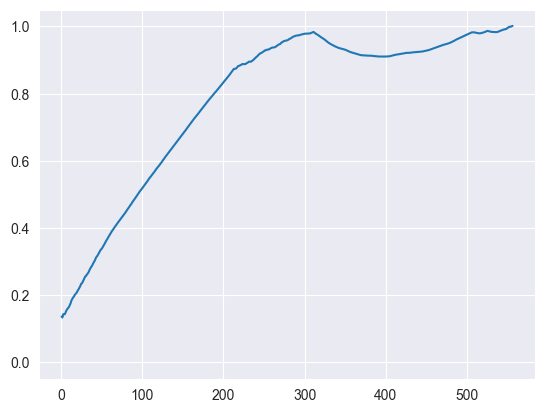

AUC of QNN =  0.7840065934107007
--- LCMC(k) Curve ---


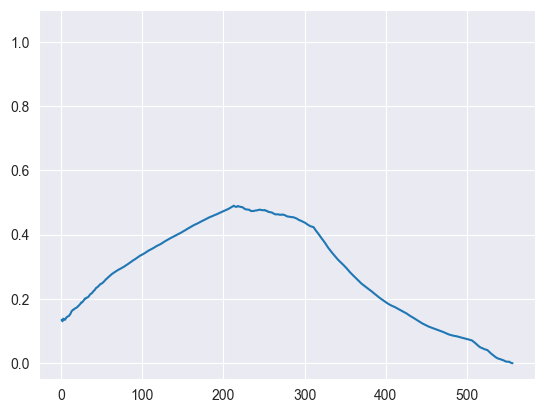

kmax (0-based index) =  212
Qlocal =  0.5282658043047709
Qglobal =  0.9424464496648136
None


In [12]:
# Evaluate Kernel PCA with kernel method with different methods
for method in kernel_methods:
    print("Evaluating method {}...".format(method))
    reduced_data = kernel_pca_reduction(scaled_single_timepoint, n_components=4, kernel_method=method, get_metrics=True)


In [17]:
min_value = scaled_single_timepoint.min().min()
print(min_value)
non_negative_scaled_single_timepoint = scaled_single_timepoint.copy() + abs(min_value)

-4.18970523797934


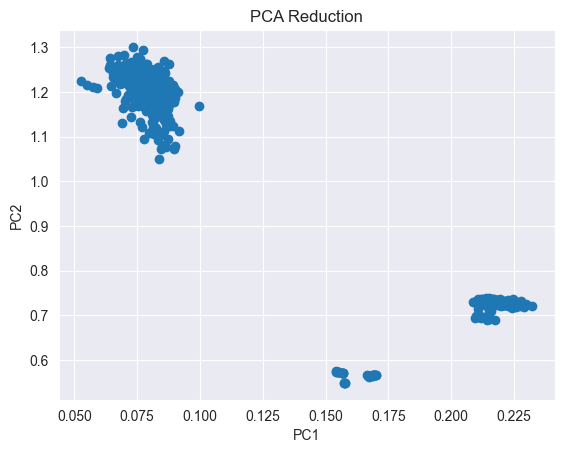

Time taken to generate ranking dataframe: 42.65s
Time taken to convert to matrix: 0.0s
Time taken to generate ranking dataframe: 40.18s
Time taken to convert to matrix: 0.0s
[[  0   1 101 ... 123 166  88]
 [  1   0  96 ... 111  95  23]
 [110  37   0 ...  90 106  43]
 ...
 [155  58 105 ...   0 102  11]
 [140  10  59 ...  37   0   1]
 [153  17  81 ...  25   1   0]]
[[  0  38  57 ... 142  33  96]
 [ 98   0 100 ... 151   6  31]
 [139 123   0 ...  60  98 111]
 ...
 [166 152  40 ...   0 133 116]
 [ 98   4  86 ... 151   0  26]
 [152  42  99 ... 135  32   0]]
R1 shape: (557, 557)
R2 shape: (557, 557)
Qlocal =  0.5296396237823083
rMSE =  0.021406665722763465
--- Distance Matrices (D and Dz) ---


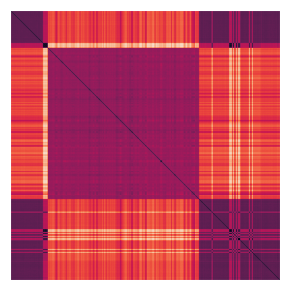

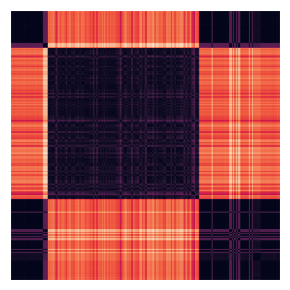

Residual Variance (using Pearson's r) =  0.10812426653994633
Residual Variance (using Spearman's r) =  0.06926190767127449
--- Ranking Matrices (R and Rz) ---


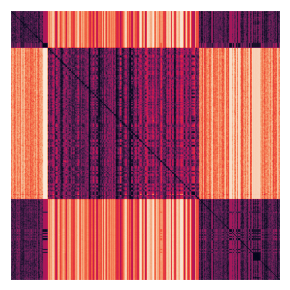

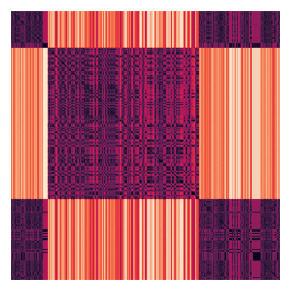

--- Co-ranking Matrix (Q) ---


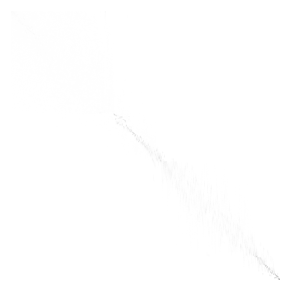

--- Trustworthiness T(k) and Continuity C(k) ---


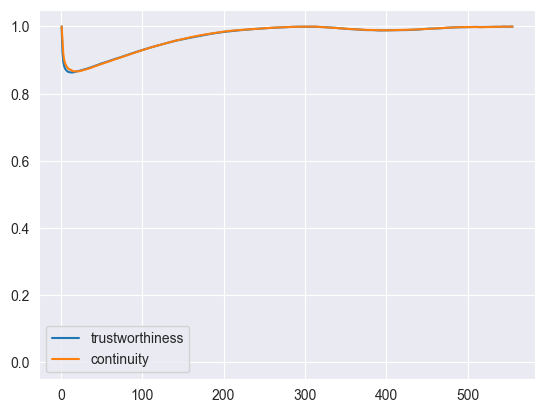

AUC of T =  0.9701395335817189
AUC of C =  0.9705639457177132
--- QNN(k) Curve ---


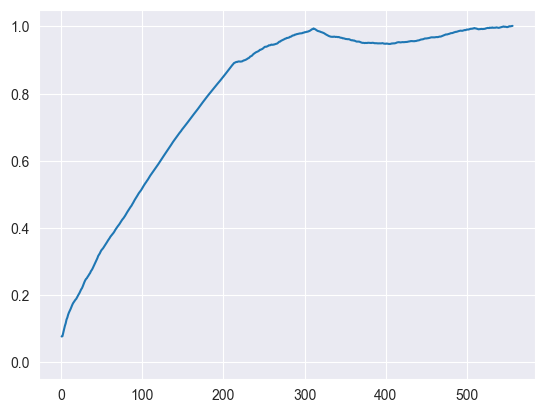

AUC of QNN =  0.7976431177518025
--- LCMC(k) Curve ---


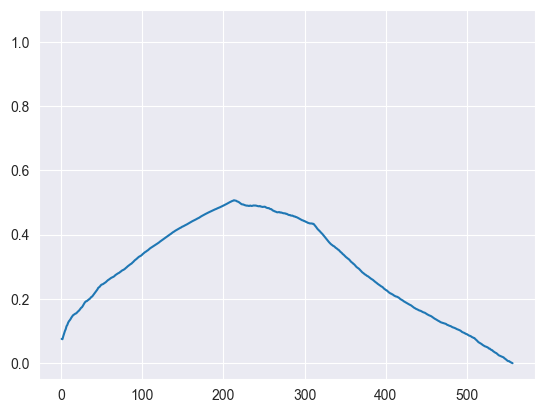

kmax (0-based index) =  212
Qlocal =  0.5296396237823083
Qglobal =  0.9637473161806052
None


array([[0.22263713, 0.73431628],
       [0.22287488, 0.72826026],
       [0.21709807, 0.73016326],
       ...,
       [0.21406563, 0.728782  ],
       [0.22183957, 0.72859603],
       [0.22073754, 0.72605581]])

In [18]:
nmf_reduction(non_negative_scaled_single_timepoint)